diffs.shape =  (9990, 120, 20)
U.shape (20, 20)


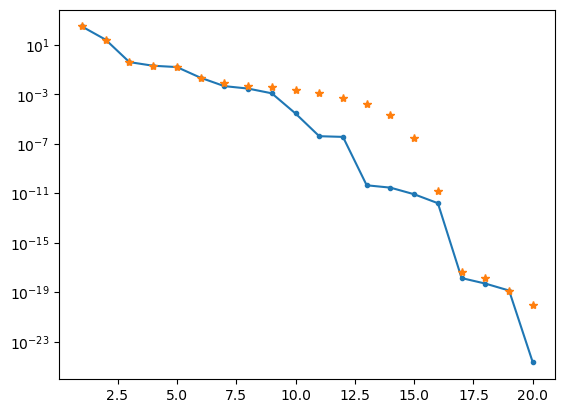

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 25 10:31:10 2024

@author: andreyvlasenko
"""

import sys



import numpy as np
import os

sys.path.append(os.path.abspath(os.path.join('..', '')))
from utilities import load_data
from matplotlib import pyplot as plt
import torch
from chemical_constants_and_parameters import S_verwer


data_path = '/work/gg0302/g260141/NACHMO_data/Verwer'
species = ["CO","HNO3","SO4","XO2","O1D","SO2","O3P","ALD2","PAN","CH3O","N2O5","NO3","HCHO","O3","C2O3","HO2","NO2","NO","CH3O2","OH"]

data, max_c = load_data(data_path,dtype=torch.float64, species=species)
data32, max_c32 = load_data(data_path,dtype=torch.float32, species=species)

xa = [(d * np.array(max_c).reshape(1, -1)).numpy() for d in data]
xa32 = [(d * np.array(max_c32).reshape(1, -1)).numpy() for d in data32]

#x = [(d / np.std(d).reshape(1, -1)) for d in xa]
#x32 = [(d / np.std(d).reshape(1, -1)) for d in xa32]

x = xa
x32 =xa32


data = x
data32 = x32

#diffs = [np.diff(v, axis=0) for v in x]

S = np.asarray(S_verwer,dtype = np.float64)
diffs = np.asarray([np.diff(v, axis=0) for v in data])
print("diffs.shape = ", diffs.shape)
for i in range(0,len(S)): S[i, :] = S[i, :] / np.std(np.ndarray.flatten(diffs[:,:,i]))

z = np.concatenate(diffs, axis=0)


diffs32 = [np.diff(v, axis=0) for v in data32]

z32 = np.concatenate(diffs32, axis=0)

u, s, v = np.linalg.svd(z.T, full_matrices=False)

u32, s32, v32 = np.linalg.svd(z32.T, full_matrices=False)

u.shape, s.shape, v.shape

plt.semilogy(np.arange(1,21), s, '.-')
plt.semilogy(np.arange(1,21), s32, '*')


print("U.shape", u.shape)

#diff = S @ np.linalg.solve(S, u) - u  # should be close to zero

#plt.imshow(u)
#plt.colorbar()
#plt.ylabel('species')
#plt.xlabel('vector space basis')